# 06 `SVM` Model Building

# 1.0 `Tokenization` and `Vectorization`

In [3]:
import numpy as np
import pandas as pd
import warnings


import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
news = pd.read_csv('../data/labeled/news_labeled.csv')
news.head()

,title,date,url,article,news_column
0,country first innovation center new power syst...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201939...,photo shows innovation center new power system...,innovation
1,th china beijing international high tech expo ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,vertical take-off landing drone display th chi...,innovation
2,china tech innovations benefit electricity dev...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,beijing july xinhua china technological foref...,innovation
3,diverse applications new technologies display ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,world ai ference waic high-level meeting glob...,industry dynamics
4,ai used help preserve china oldest wooden pagoda,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201936...,sakyamuni pagoda also known yingxian wooden pa...,industry dynamics


### 1.1 Tokenization

In [7]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]
    return tokens

In [9]:
news['tokenize_article'] = news['article'].apply(tokenize_text)

In [26]:
news['tokenize_article'] = news['tokenize_article'].apply(lambda x: ' '.join(x))

In [28]:
news.head()

,title,date,url,article,news_column,tokenize_article
0,country first innovation center new power syst...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201939...,photo shows innovation center new power system...,innovation,photo shows innovation center new power system...
1,th china beijing international high tech expo ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,vertical take-off landing drone display th chi...,innovation,vertical take-off landing drone display th chi...
2,china tech innovations benefit electricity dev...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,beijing july xinhua china technological foref...,innovation,beijing july xinhua china technological forefr...
3,diverse applications new technologies display ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,world ai ference waic high-level meeting glob...,industry dynamics,world ai ference waic high-level meeting globa...
4,ai used help preserve china oldest wooden pagoda,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201936...,sakyamuni pagoda also known yingxian wooden pa...,industry dynamics,sakyamuni pagoda also known yingxian wooden pa...


In [32]:
# news['tokenize_article'][0]

## 1.2 Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [42]:
article_vectorized = vectorizer.fit_transform(news['tokenize_article'])
article_vectorized_df = pd.DataFrame(article_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
news['vectorized_article'] = list(article_vectorized.toarray())

In [44]:
news.head()

,title,date,url,article,news_column,tokenize_article,vectorized_article
0,country first innovation center new power syst...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201939...,photo shows innovation center new power system...,innovation,photo shows innovation center new power system...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,th china beijing international high tech expo ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,vertical take-off landing drone display th chi...,innovation,vertical take-off landing drone display th chi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,china tech innovations benefit electricity dev...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,beijing july xinhua china technological foref...,innovation,beijing july xinhua china technological forefr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,diverse applications new technologies display ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,world ai ference waic high-level meeting glob...,industry dynamics,world ai ference waic high-level meeting globa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,ai used help preserve china oldest wooden pagoda,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201936...,sakyamuni pagoda also known yingxian wooden pa...,industry dynamics,sakyamuni pagoda also known yingxian wooden pa...,"[0.0, 0.0, 0.0, 0.0, 0.02208484815620295, 0.0,..."


In [50]:
type(news['vectorized_article'][0][0])

numpy.float64

In [52]:
news.columns

Index(['title', 'date', 'url', 'article', 'news_column', 'tokenize_article',
       'vectorized_article'],
      dtype='object')

In [126]:
news.head()

,title,date,url,article,news_column,tokenize_article,vectorized_article
0,country first innovation center new power syst...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201939...,photo shows innovation center new power system...,innovation,photo shows innovation center new power system...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,th china beijing international high tech expo ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,vertical take-off landing drone display th chi...,innovation,vertical take-off landing drone display th chi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,china tech innovations benefit electricity dev...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,beijing july xinhua china technological foref...,innovation,beijing july xinhua china technological forefr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,diverse applications new technologies display ...,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201938...,world ai ference waic high-level meeting glob...,industry dynamics,world ai ference waic high-level meeting globa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,ai used help preserve china oldest wooden pagoda,2024-07-15,http://en.people.cn/n3/2024/0715/c90000-201936...,sakyamuni pagoda also known yingxian wooden pa...,industry dynamics,sakyamuni pagoda also known yingxian wooden pa...,"[0.0, 0.0, 0.0, 0.0, 0.02208484815620295, 0.0,..."


---

# 2.0 `Model Building` and `Evaluation`

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## 2.1 Set features and target variable.

In [129]:
X = news['vectorized_article']  
y = news['news_column'] 

## 2.2 Split the Data

In [105]:
X_vectorized = pd.DataFrame(X.tolist())

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

### 2.3 **Train** and **Evaluate** models with different kernels `'linear', 'rbf', 'sigmoid', 'poly'`

In [139]:
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
results = {}

Kernel: linear, Accuracy: 0.57


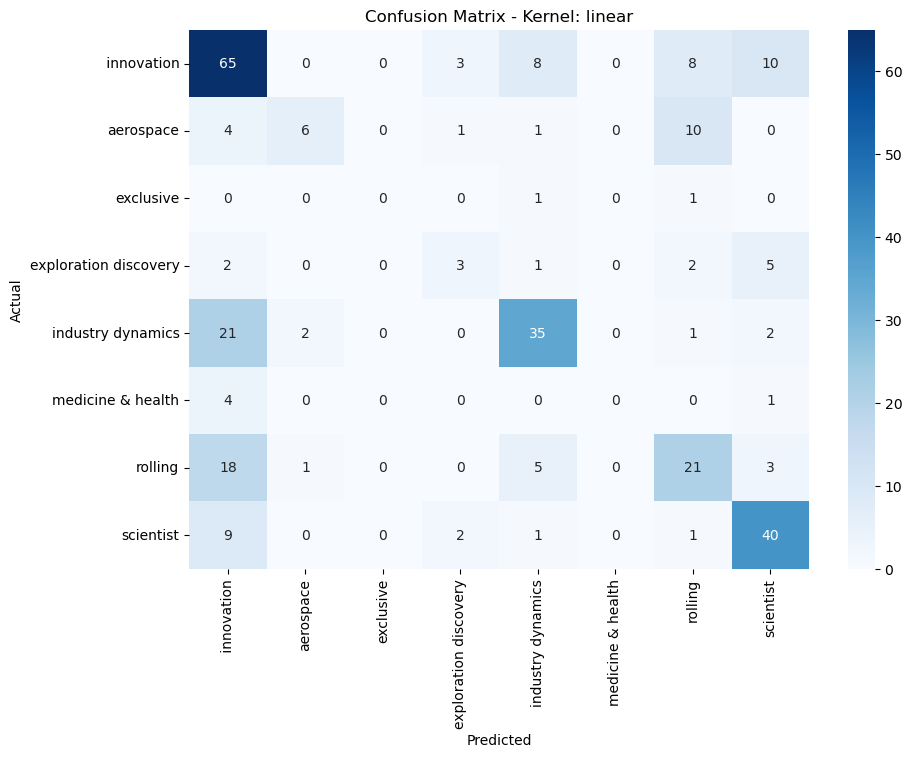

Kernel: rbf, Accuracy: 0.55


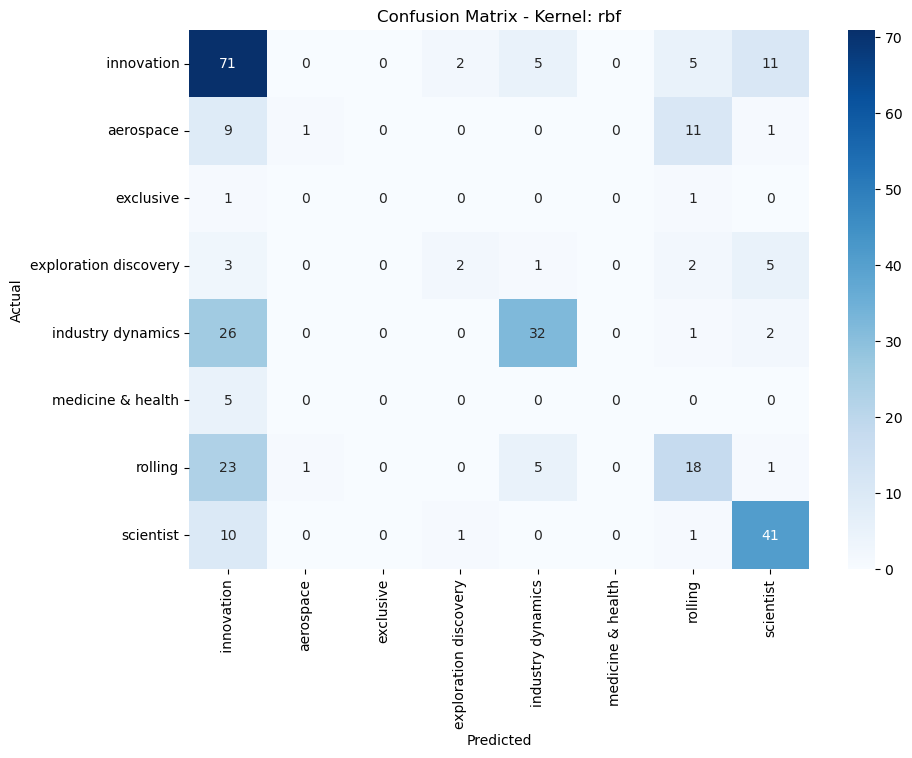

Kernel: sigmoid, Accuracy: 0.56


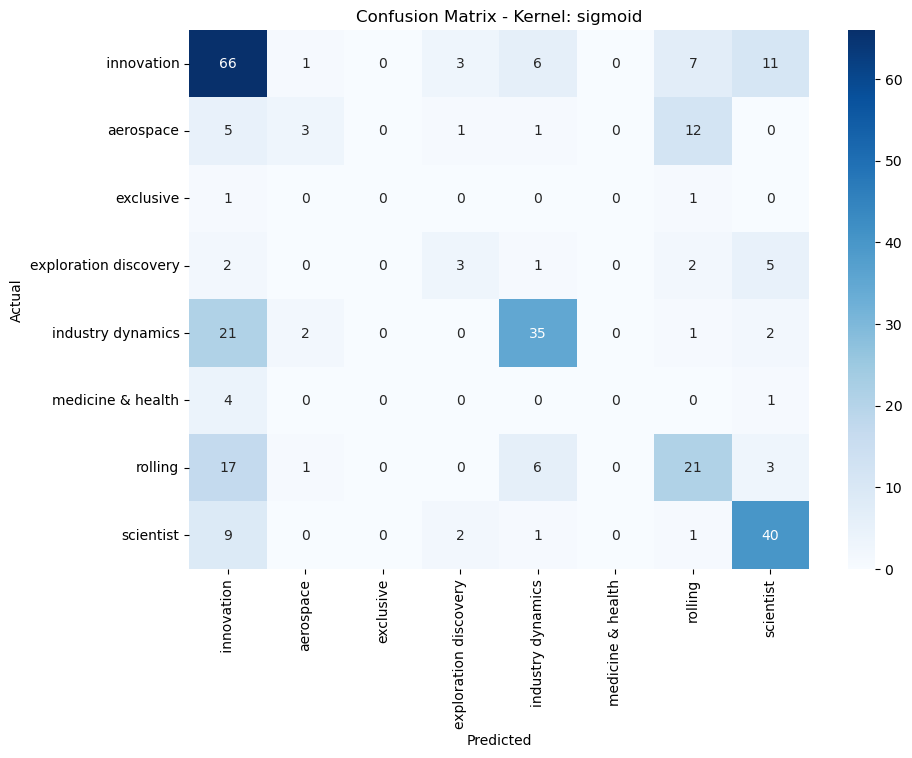

Kernel: poly, Accuracy: 0.42


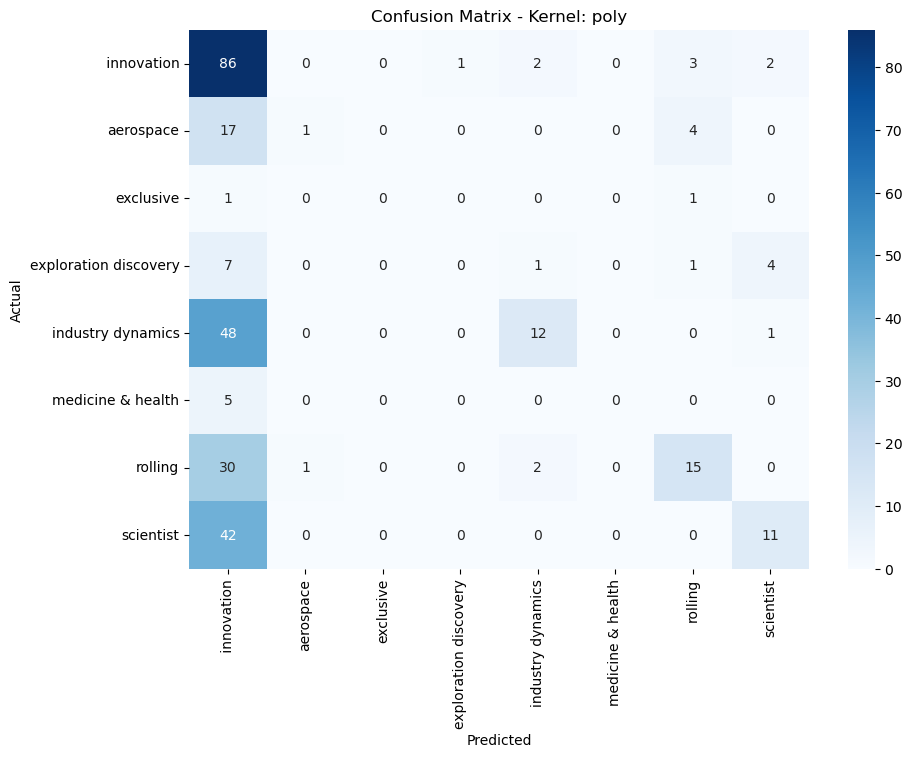

In [141]:
for kernel in kernels:
    model = SVC(kernel=kernel)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[kernel] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f'Kernel: {kernel}, Accuracy: {accuracy:.2f}')
    
    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(results[kernel]['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - Kernel: {kernel}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()